Adrian-Nichita Zloteanu
MSCS-634  
Lab 2 – KNN vs RNN on the Wine Dataset

First, I will load the dataset, and display the feature & target names:

In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
X = wine.data
y = wine.target

# display feature & target names
print("Feature names:", wine.feature_names)
print("Target names:", wine.target_names)

# Create a DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

df.head()

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
# Get unique class labels and their counts
classes, counts = np.unique(y, return_counts=True)

# Print distribution
for cls, count in zip(classes, counts):
    print(f"class {cls}: {count} samples")

class 0: 59 samples
class 1: 71 samples
class 2: 48 samples


Now I will split the dataset into 80% training and 20% testing sets

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

print("Training size:", X_train.shape[0])
print("Testing size:", X_test.shape[0])

Training size: 142
Testing size: 36


Step 2: K-Nearest Neighbors (KNN)

Using the k-values from the assignment, I will train the model and evaluate accuracy on the test set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21] # From assignment

# Saving for later assignment
knn_accuracies = []

for k in k_values:
    # create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the model
    knn.fit(X_train, y_train)

    # predict the labels of the test set
    y_pred = knn.predict(X_test)

    # calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k={k} accuracy: {acc}")

k=1 accuracy: 0.7777777777777778
k=5 accuracy: 0.6944444444444444
k=11 accuracy: 0.6944444444444444
k=15 accuracy: 0.6388888888888888
k=21 accuracy: 0.6666666666666666


Step 3: Radius Neighbours (RNN)

Similar to the previous step, we will test a Radius Neighbours classifier

In [36]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]

# Saving for later assignment
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    mask = y_pred != -1
    acc = accuracy_score(y_test[mask], y_pred[mask])

    rnn_accuracies.append(acc)
    print(f"radius={radius} accuracy: {acc}")

radius=350 accuracy: 0.6388888888888888
radius=400 accuracy: 0.6111111111111112
radius=450 accuracy: 0.6111111111111112
radius=500 accuracy: 0.6111111111111112
radius=550 accuracy: 0.6111111111111112
radius=600 accuracy: 0.6111111111111112


For step 4, I will plot charts for accuracy of KNN and RNN algorithms

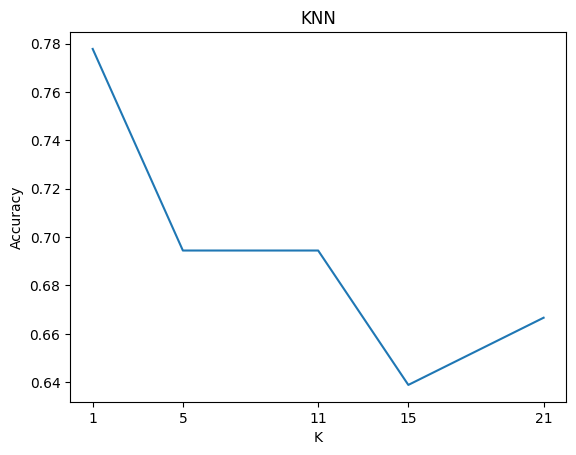

In [42]:
import matplotlib.pyplot as plt

plt.plot(k_values, knn_accuracies)
plt.title('KNN')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

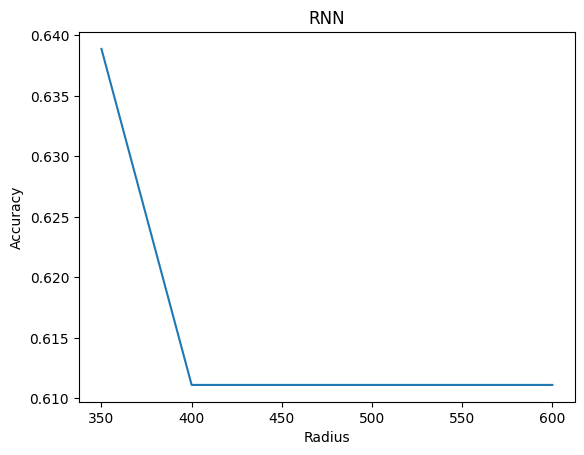

In [45]:
plt.plot(radius_values, rnn_accuracies)
plt.title('RNN')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.xticks(radius_values)
plt.show()

Result analysis

KNN clearly outperformed RNN for this scenario. Best accuracy for KNN started at ~78% when K=1, while best recorded accuracy for RNN was less than 64%. Even the worst performance for RNN, with k=15, outperformed KNN.

For KNN, the accuracy continously dropped, rebounding a bit between K=15 and K=21, but it never got close to the original performance. This suggests KNN works best with fewer neighbours for this dataset.

For RNN, as mentioned before, accuracy was lower. Highest was slightly less than 64% at the starting radius of 350, but afterwards it steeply dropped for all other values. 

Overall, it seems KNN is more stable and accurate for this dataset. 


